# RF

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
file_path_RFL = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_RFL = pd.read_csv(file_path_RFL)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'FSO_Att' in data_RFL.columns:
    data_RFL = data_RFL.drop(['FSO_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 0 for FSO
filtered_data_RFL = data_RFL[data_RFL['SYNOPCode'] == 0]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_RFL= pd.get_dummies(filtered_data_RFL, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_RFL.columns:
    df_RFL['sin_time'] = np.sin(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL['cos_time'] = np.cos(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_RFL


,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_0,sin_time,cos_time
0,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.000000,0.000000,0.000000,0.0,...,65884.518460,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939,1,0.707107,-0.707107
1,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,0.0,...,64963.410920,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393,1,0.707107,-0.707107
2,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,0.0,...,54794.281070,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809,1,0.500000,-0.866025
3,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,0.0,...,50205.641590,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951,1,0.500000,-0.866025
4,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,0.0,...,59038.325990,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052,1,0.500000,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,11.968291,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,0.0,...,13041.847800,13458.340663,12411.852994,91.391749,0.000000,0.027596,0.000000,1,0.866025,0.500000
91375,11.538030,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,0.0,...,15959.633590,16232.735439,15345.485232,47.997946,0.075640,0.349551,0.069834,1,0.866025,0.500000
91376,11.491891,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,0.0,...,13129.663750,13948.560177,11925.979953,103.963102,0.052282,0.178062,0.049824,1,0.866025,0.500000
91377,11.526529,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,0.0,...,15082.787860,15522.762221,14842.654291,82.090779,0.443520,1.838449,0.413146,1,0.965926,0.258819


In [2]:

# Split the FSO data into features and target
X_RFL= df_RFL.drop(['RFL_Att'], axis=1)  # Features for FSO
y_RFL= df_RFL['RFL_Att']  # Target for FSO

In [3]:
# Split the FSO data into training and test sets
X_train_RFL, X_test_RFL, y_train_RFL, y_test_RFL = train_test_split(X_RFL, y_RFL, test_size=0.2, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_RFL = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_RFL = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_RFL = RandomizedSearchCV(
    estimator=rf_RFL,
    param_distributions=param_distributions_RFL,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_RFL.fit(X_train_RFL, y_train_RFL)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C11BD93850>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C11E1930D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C11E1939D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C117D4E8D0>},
                   random_state=42, verbose=1)

In [4]:
# The best hyperparameters and score for FSO
best_params_RFL = random_search_RFL.best_params_
best_score_RFL= random_search_RFL.best_score_
print(f"Best hyperparameters for FSO: {best_params_RFL}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_RFL}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.9707484531321302


In [5]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL = pd.DataFrame(X_train_RFL, columns=df_RFL.drop('RFL_Att', axis=1).columns)
train_df_RFL['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL= rank_variables_oob(train_df_RFL, 'RFL_Att', best_params_RFL)
print(rankings_table_RFL)


         Removed Variable     RSMSE       R^2  Remaining Variables
13               sin_time  0.415358  0.973567                   12
12         TemperatureMax  0.418083  0.973219                   13
16       RelativeHumidity  0.419846  0.972992                    9
15          VisibilityMax  0.421564  0.972771                   10
6          ParticulateMin  0.423775  0.972484                   19
8            WindSpeedMin  0.424167  0.972433                   17
7           WindDirection  0.424242  0.972424                   18
9               WindSpeed  0.424274  0.972419                   16
0           RainIntensity  0.424565  0.972382                   25
3             SYNOPCode_0  0.424576  0.972380                   22
5          ParticulateMax  0.424593  0.972378                   20
2        RainIntensityMin  0.424683  0.972366                   23
1        RainIntensityMax  0.425098  0.972312                   24
4             Particulate  0.425098  0.972312                 

In [6]:
FSO_table=rankings_table_RFL
rankings_table_RFL 

,Removed Variable,RSMSE,R^2,Remaining Variables
13,sin_time,0.415358,0.973567,12
12,TemperatureMax,0.418083,0.973219,13
16,RelativeHumidity,0.419846,0.972992,9
15,VisibilityMax,0.421564,0.972771,10
6,ParticulateMin,0.423775,0.972484,19
8,WindSpeedMin,0.424167,0.972433,17
7,WindDirection,0.424242,0.972424,18
9,WindSpeed,0.424274,0.972419,16
0,RainIntensity,0.424565,0.972382,25
3,SYNOPCode_0,0.424576,0.972380,22


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_13288\4031568339.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


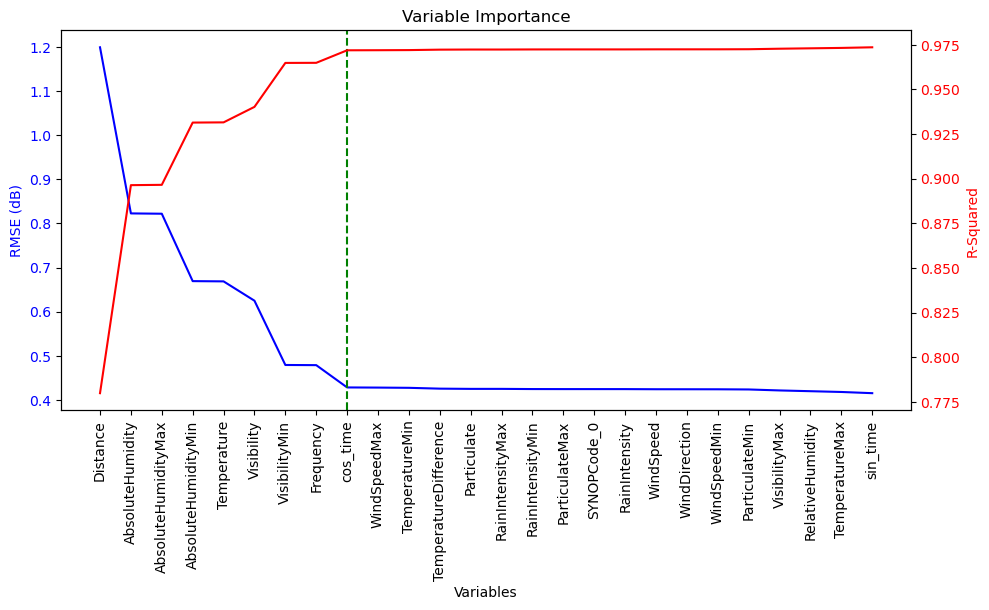

In [20]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 8
cutoff_variable = rankings_table_sorted_RFL.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [30]:
selected_features_RFL= [
    'cos_time',
    'Frequency',
    'VisibilityMin',
    'Visibility',
    'Temperature',
    'AbsoluteHumidityMin',
    'AbsoluteHumidityMax',
    'AbsoluteHumidity',
    'Distance'
]

In [31]:
# Select only the chosen features for training and testing
X_train_selected_RFL = X_train_RFL[selected_features_RFL]
X_test_selected_RFL = X_test_RFL[selected_features_RFL]

# Retrain the model with the selected features and best hyperparameters
final_model_RFL= RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_RFL = final_model_RFL.predict(X_test_selected_RFL)

# Calculate RMSE and R-squared on the testing set
test_rmse_RFL= mean_squared_error(y_test_RFL, predictions_RFL, squared=False)
test_r2_RFL = r2_score(y_test_RFL, predictions_RFL)

print(f"Test RMSE: {test_rmse_RFL}")
print(f"Test R^2: {test_r2_RFL}")


Test RMSE: 0.4183281462106023
Test R^2: 0.9733450022873554


In [ ]:
0.9733450022873554

# FSO

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
fso_file_path = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_FSO = pd.read_csv(fso_file_path)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'RFL_Att' in data_FSO.columns:
    data_FSO = data_FSO.drop(['RFL_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 0 for FSO
filtered_data_FSO = data_FSO[data_FSO['SYNOPCode'] == 0]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_FSO = pd.get_dummies(filtered_data_FSO, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_FSO.columns:
    df_FSO['sin_time'] = np.sin(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO['cos_time'] = np.cos(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_FSO


,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_0,sin_time,cos_time
0,7.913289,17.595709,17.615907,17.340148,2115.338398,83500000000,0.000000,0.000000,0.000000,0.0,...,65884.518460,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939,1,0.707107,-0.707107
1,7.451176,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,0.0,...,64963.410920,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393,1,0.707107,-0.707107
2,7.072747,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,0.0,...,54794.281070,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809,1,0.500000,-0.866025
3,6.949288,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,0.0,...,50205.641590,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951,1,0.500000,-0.866025
4,7.361052,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,0.0,...,59038.325990,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052,1,0.500000,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,9.150012,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,0.0,...,13041.847800,13458.340663,12411.852994,91.391749,0.000000,0.027596,0.000000,1,0.866025,0.500000
91375,9.333777,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,0.0,...,15959.633590,16232.735439,15345.485232,47.997946,0.075640,0.349551,0.069834,1,0.866025,0.500000
91376,8.873168,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,0.0,...,13129.663750,13948.560177,11925.979953,103.963102,0.052282,0.178062,0.049824,1,0.866025,0.500000
91377,9.538886,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,0.0,...,15082.787860,15522.762221,14842.654291,82.090779,0.443520,1.838449,0.413146,1,0.965926,0.258819


In [12]:

# Split the FSO data into features and target
X_FSO = df_FSO.drop(['FSO_Att'], axis=1)  # Features for FSO
y_FSO = df_FSO['FSO_Att']  # Target for FSO

In [13]:
# Split the FSO data into training and test sets
X_train_FSO, X_test_FSO, y_train_FSO, y_test_FSO = train_test_split(X_FSO, y_FSO, test_size=0.2, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_FSO = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_FSO = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_FSO = RandomizedSearchCV(
    estimator=rf_FSO,
    param_distributions=param_distributions_FSO,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_FSO.fit(X_train_FSO, y_train_FSO)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C12BB9FB50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C12BBF8990>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C12C9D68D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C12BBEF610>},
                   random_state=42, verbose=1)

In [14]:
# The best hyperparameters and score for FSO
best_params_FSO = random_search_FSO.best_params_
best_score_FSO = random_search_FSO.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 14, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 158}
Best OOB score from RandomizedSearchCV for FSO: 0.9205058760533559


In [15]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO = pd.DataFrame(X_train_FSO, columns=df_FSO.drop('FSO_Att', axis=1).columns)
train_df_FSO['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO = rank_variables_oob(train_df_FSO, 'FSO_Att', best_params_FSO)
print(rankings_table_FSO)


         Removed Variable     RSMSE       R^2  Remaining Variables
10           WindSpeedMax  0.960671  0.925113                   15
8               WindSpeed  0.960808  0.925092                   17
9             Particulate  0.960845  0.925086                   16
6          ParticulateMax  0.963698  0.924641                   19
7     AbsoluteHumidityMin  0.963808  0.924623                   18
5           WindDirection  0.966066  0.924270                   20
2        RainIntensityMin  0.966194  0.924250                   23
11               sin_time  0.966350  0.924225                   14
0           RainIntensity  0.966383  0.924220                   25
3             SYNOPCode_0  0.966446  0.924210                   22
4               Frequency  0.966567  0.924191                   21
1        RainIntensityMax  0.966600  0.924186                   24
12         ParticulateMin  0.996259  0.919462                   13
14               cos_time  1.031033  0.913742                 

In [16]:
FSO_table=rankings_table_FSO 
rankings_table_FSO 

,Removed Variable,RSMSE,R^2,Remaining Variables
10,WindSpeedMax,0.960671,0.925113,15
8,WindSpeed,0.960808,0.925092,17
9,Particulate,0.960845,0.925086,16
6,ParticulateMax,0.963698,0.924641,19
7,AbsoluteHumidityMin,0.963808,0.924623,18
5,WindDirection,0.966066,0.924270,20
2,RainIntensityMin,0.966194,0.924250,23
11,sin_time,0.966350,0.924225,14
0,RainIntensity,0.966383,0.924220,25
3,SYNOPCode_0,0.966446,0.924210,22


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_13288\1637131890.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)


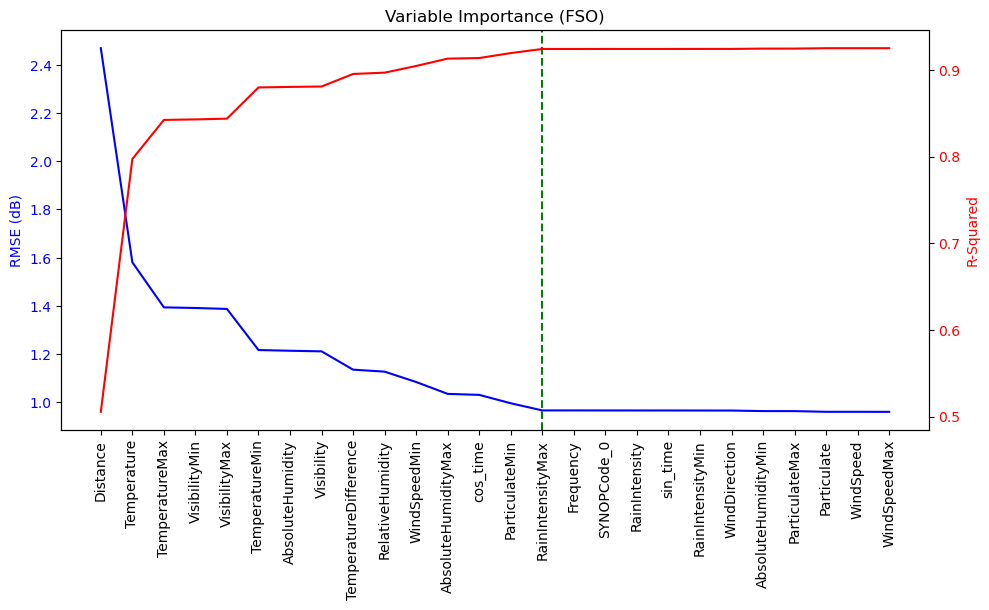

In [36]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')

ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 14
cutoff_variable = rankings_table_sorted_FSO.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance (FSO)')
plt.show()


In [55]:
selected_features_FSO = [
    'RainIntensityMax',
    'ParticulateMin',
    'cos_time',
    'AbsoluteHumidityMax',
    'WindSpeedMin',
    'RelativeHumidity',
    'TemperatureDifference',
    'Visibility',
    'AbsoluteHumidity',
    'TemperatureMin',
    'VisibilityMax',
    'VisibilityMin',
    'TemperatureMax',
    'Temperature',
    'Distance'
]


In [56]:
# Select only the chosen features for training and testing
X_train_selected_FSO = X_train_FSO[selected_features_FSO]
X_test_selected_FSO = X_test_FSO[selected_features_FSO]

# Retrain the model with the selected features and best hyperparameters
final_model_FSO = RandomForestRegressor(
    bootstrap=True,
    max_depth=14,
    min_samples_leaf=9,
    min_samples_split=2,
    n_estimators=158,
    oob_score=True,
    random_state=42
)
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

RandomForestRegressor(max_depth=14, min_samples_leaf=9, n_estimators=158,
                      oob_score=True, random_state=42)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_FSO = final_model_FSO.predict(X_test_selected_FSO)

# Calculate RMSE and R-squared on the testing set
test_rmse_FSO = mean_squared_error(y_test_FSO, predictions_FSO, squared=False)
test_r2_FSO = r2_score(y_test_FSO, predictions_FSO)

print(f"Test RMSE: {test_rmse_FSO}")
print(f"Test R^2: {test_r2_FSO}")


Test RMSE: 0.9817533895632858
Test R^2: 0.9240729847340114


# Plot

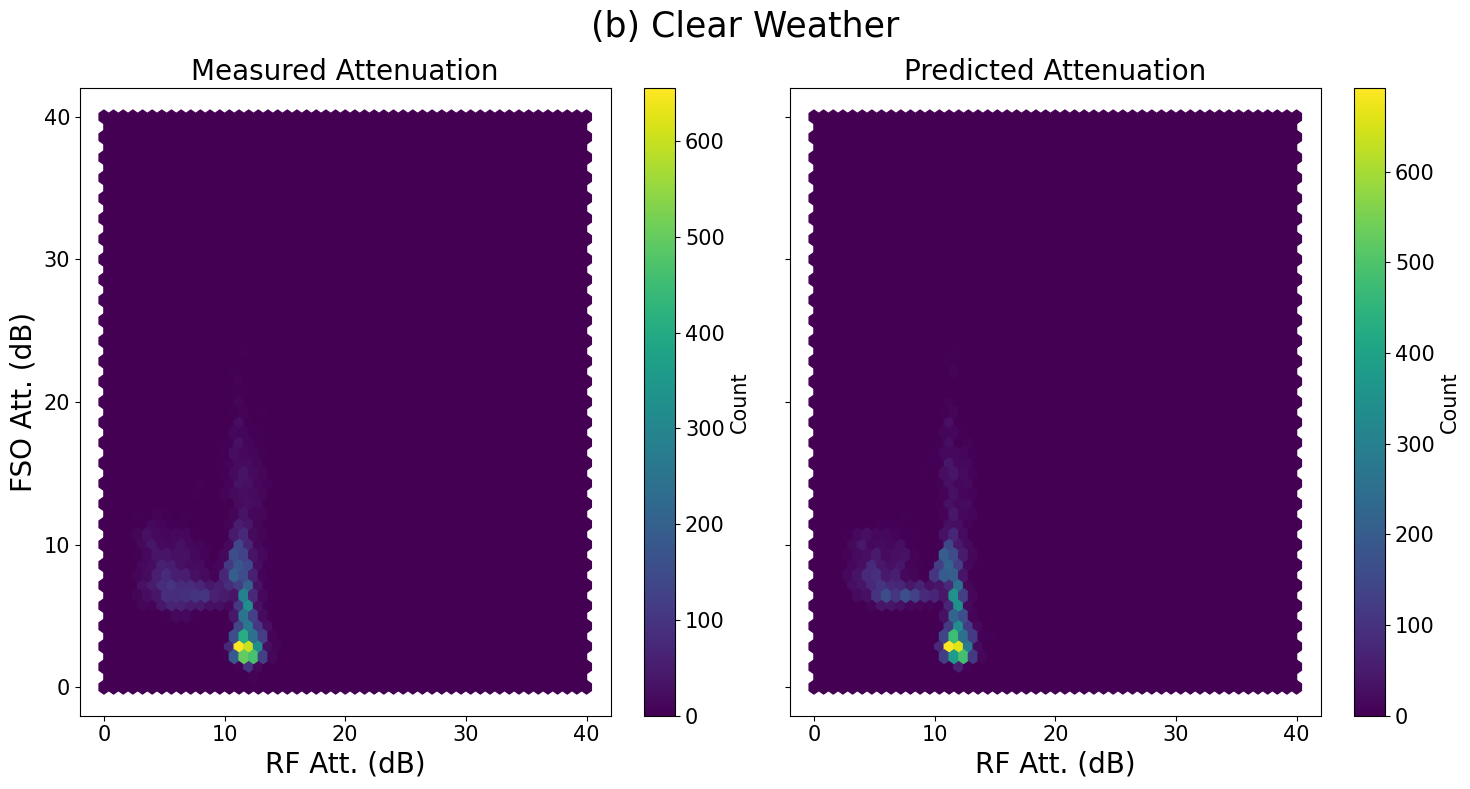

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are the numpy arrays you've prepared with your data
measured_attenuation_RFL = np.array(y_test_RFL)
predicted_attenuation_RFL = np.array(predictions_RFL)
measured_attenuation_FSO = np.array(y_test_FSO)
predicted_attenuation_FSO = np.array(predictions_FSO)

# Set up the matplotlib figure (adjust figsize to closely match the aspect ratio of the example image)
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Define the extent and ticks for the plots
extent = [0, 40, 0, 40]
ticks = [0, 10, 20, 30, 40]

# Heatmap for Measured FSO Attenuation vs RF Attenuation
hb1 = ax[0].hexbin(measured_attenuation_RFL, measured_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[0].set_title('Measured Attenuation', fontsize=20)
ax[0].set_xlabel('RF Att. (dB)', fontsize=20)
ax[0].set_ylabel('FSO Att. (dB)', fontsize=20)
ax[0].set_xticks(ticks)
ax[0].set_yticks(ticks)
cb1 = fig.colorbar(hb1, ax=ax[0])
cb1.set_label('Count', fontsize=15)

# Heatmap for Predicted FSO Attenuation vs RF Attenuation
hb2 = ax[1].hexbin(predicted_attenuation_RFL, predicted_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[1].set_title('Predicted Attenuation', fontsize=20)
ax[1].set_xlabel('RF Att. (dB)', fontsize=20)
ax[1].set_xticks(ticks)
ax[1].set_yticks(ticks)  # This may be redundant since y-axis is shared with the first plot
cb2 = fig.colorbar(hb2, ax=ax[1])
cb2.set_label('Count', fontsize=15)

plt.suptitle('(b) Clear Weather',fontsize=25)


ax[0].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
ax[1].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
cb1.ax.tick_params(labelsize=15) 
cb2.ax.tick_params(labelsize=15) 
plt.tight_layout()
plt.show()


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_13288\3247852848.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_13288\3247852848.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


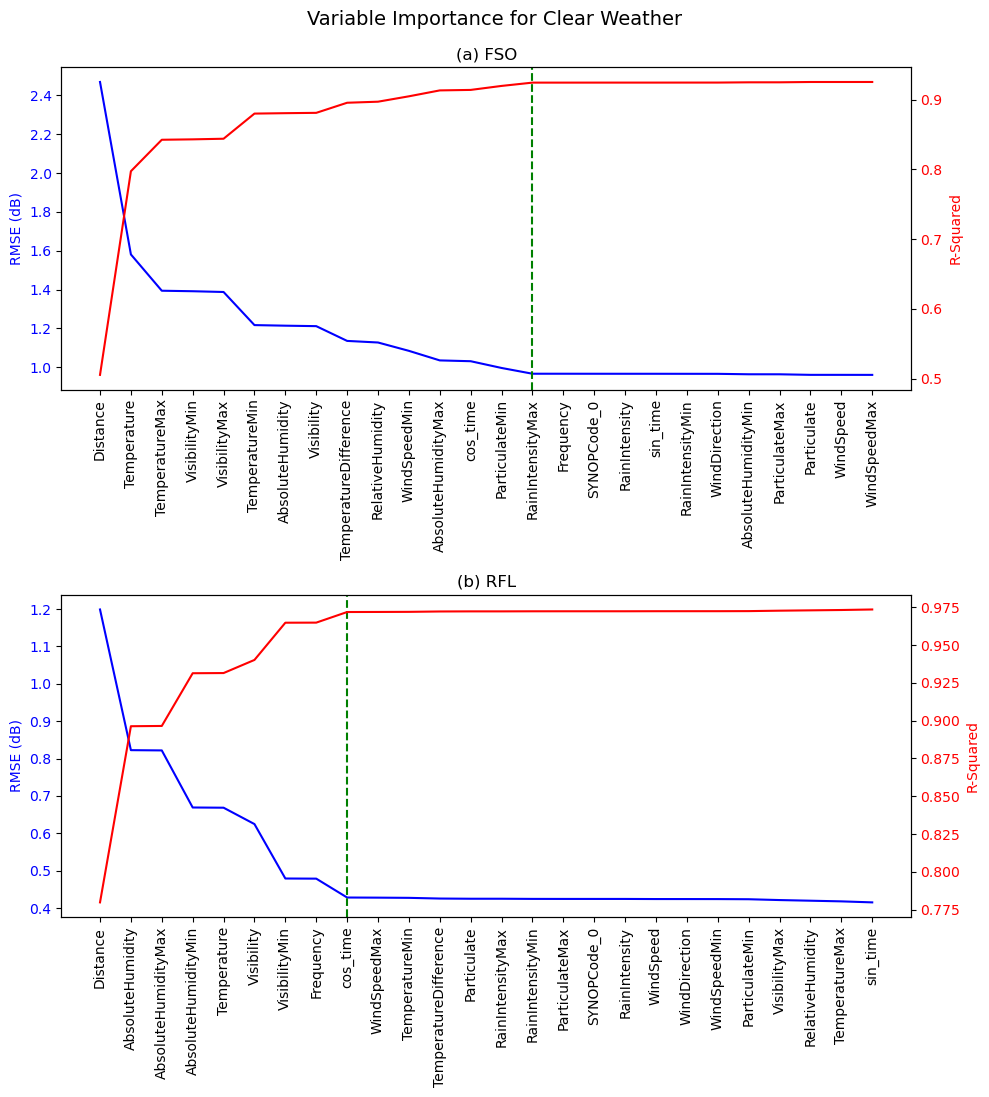

In [69]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Creating subplots with FSO on top and RFL at the bottom

# Plot for FSO
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax1.set_title('(a) FSO')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 14  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO.loc[cutoff_index_FSO, 'Removed Variable']
ax1.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Plot for RFL
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)
ax2.set_title('(b) RFL')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 8  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL.loc[cutoff_index_RFL, 'Removed Variable']
ax2.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance for Clear Weather ', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()
